In [9]:
#Import reqd Libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import mnist training data and set in a dataframe
d0 = pd.read_csv('mnist_train.csv')

#print first 5 rows of the data
d0.head()



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
l = d0['label']

d = d0.drop('label',axis=1)

In [3]:
# now l contains only labels data
l

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [4]:
#d contains only pixels data ie. after dropping labels

d

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
d.shape

(42000, 784)

In [8]:
l.shape

(42000,)

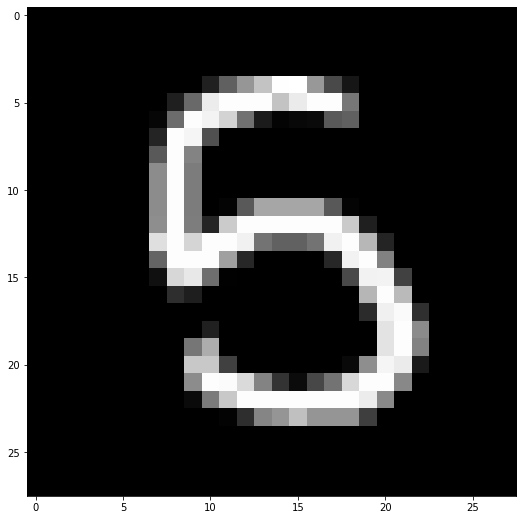

5
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 107, Length: 784, dtype: int64


In [43]:
#plot a figure

#create a 7*7 empty image
plt.figure(figsize=(9,9))
idx = 107


#loads data from dataframe d in form of pandas series and converts into a matriz of 28*28 =784 pizel points
grid_data = d.iloc[idx].values.reshape(28,28)
# use image show function to display image of the matrix grid_data
plt.imshow(grid_data,interpolation= "none" , cmap="gray")
#show image
plt.show()

print(l[idx])
print(d.iloc[idx])

In [ ]:
#As we can see above the image displayed using Matplotlib and the label index both are appearing correctly 
#This is a very basic notebook to display a digit using baisc pandas , numpy and Matploylib